# Process NO2 data from Cloud Raster Format file

In [1]:
from arcgis.gis import GIS
from arcgis.raster import RasterCollection, Raster
from arcgis import raster
import arcpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crf_path = r'Y:\Documents\GIS_data\Imagery\sentinel-5p\ny-2019-2020\ny_crf\ny_19_20.crf'

In [3]:
gis= GIS()

#### degbug lines
```python
from arcgis.raster import RasterCollection, Raster
from arcgis import raster
import arcpy
crf_path = r'Y:\Documents\GIS_data\Imagery\sentinel-5p\ny-2019-2020\ny_crf\ny_19_20.crf'
all_rc = RasterCollection(crf_path)
all_2019 = all_rc.filter_by_calendar_range('YEAR',2019,2019)
no2_19 = all_2019.filter_by_attribute(field_name='Variable', 
                                          operator='CONTAINS', 
                                          field_values='nitrogendioxide')
r1 = no2_19[0]['Raster']
```

## Read into a `RasterCollection` object

In [4]:
all_rc = RasterCollection(crf_path)
all_rc

,Variable,StdTime,Raster
0,/product/nitrogendioxide_tropospheric_column,2019-04-01T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
1,/product/nitrogendioxide_tropospheric_column,2019-04-03T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
2,/product/nitrogendioxide_tropospheric_column,2019-04-04T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
3,/product/nitrogendioxide_tropospheric_column,2019-04-05T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
4,/product/nitrogendioxide_tropospheric_column,2019-04-06T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
5,/product/nitrogendioxide_tropospheric_column,2019-04-07T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
6,/product/nitrogendioxide_tropospheric_column,2020-04-01T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
7,/product/nitrogendioxide_tropospheric_column,2020-04-02T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
8,/product/nitrogendioxide_tropospheric_column,2020-04-03T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...
9,/product/nitrogendioxide_tropospheric_column,2020-04-04T00:00:00+00:00,<arcgis.raster._layer.Raster object at 0x00000...


### Filter out data for 2019 and 2020

In [5]:
type(all_rc)

arcgis.raster._layer.RasterCollection

In [6]:
all_2019 = all_rc.filter_by_calendar_range('YEAR',2019,2019)
all_2020 = all_rc.filter_by_calendar_range('YEAR',2020,2020)
print(all_2019.count, all_2020.count)

12 12


In [7]:
no2_19 = all_2019.filter_by_attribute(field_name='Variable', 
                                          operator='CONTAINS', 
                                          field_values='nitrogendioxide')

no2_20 = all_2020.filter_by_attribute(field_name='Variable', 
                                          operator='CONTAINS', 
                                          field_values='nitrogendioxide')
print(no2_19.count, no2_20.count)

6 6


In [8]:
qa_19 = all_2019.filter_by_attribute(field_name='Variable', 
                                          operator='CONTAINS', 
                                          field_values='qa_value')

qa_20 = all_2020.filter_by_attribute(field_name='Variable', 
                                          operator='CONTAINS', 
                                          field_values='qa_value')
print(qa_19.count, qa_20.count)

6 6


## Process data for 2019

### Read individual `Raster`s from `RasterCollection`

In [12]:
no2_19

,Raster,Variable,StdTime
0,<arcgis.raster._layer.Raster object at 0x00000...,/product/nitrogendioxide_tropospheric_column,2019-04-01T00:00:00+00:00
1,<arcgis.raster._layer.Raster object at 0x00000...,/product/nitrogendioxide_tropospheric_column,2019-04-03T00:00:00+00:00
2,<arcgis.raster._layer.Raster object at 0x00000...,/product/nitrogendioxide_tropospheric_column,2019-04-04T00:00:00+00:00
3,<arcgis.raster._layer.Raster object at 0x00000...,/product/nitrogendioxide_tropospheric_column,2019-04-05T00:00:00+00:00
4,<arcgis.raster._layer.Raster object at 0x00000...,/product/nitrogendioxide_tropospheric_column,2019-04-06T00:00:00+00:00
5,<arcgis.raster._layer.Raster object at 0x00000...,/product/nitrogendioxide_tropospheric_column,2019-04-07T00:00:00+00:00


In [36]:
r1 = no2_19[0]['Raster']
type(r1)

arcgis.raster._layer.Raster

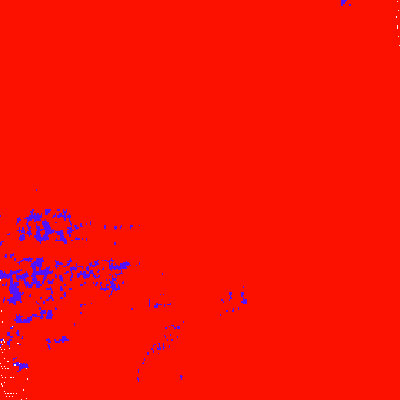

In [37]:
qa1 = qa_19[0]['Raster']
qa1

### Bug - Filter out bad cells

In [35]:
arcpy.env.matchMultidimensionalVariable = False

Failed to apply Raster Function: '{"rasterFunction": "Local", "rasterFunctionArguments": {"Rasters": [{"rasterFunction": "Local", "rasterFunctionArguments": {"Rasters": [{"rasterFunction": "Local", "rasterFunctionArguments": {"Rasters": ["C:\\Users\\atma6951\\AppData\\Local\\Temp\\xa8923c47_9c4e_4d82_9815_ef27849326fcy0.afr", 0.75], "Operation": 29, "ExtentType": 0, "CellsizeType": 0}, "variableName": "Rasters"}, {"rasterFunction": "Local", "rasterFunctionArguments": {"Rasters": ["C:\\Users\\atma6951\\AppData\\Local\\Temp\\x009d63c6_5eab_4a00_9257_c7392b987fa9y0.afr", 0], "Operation": 29, "ExtentType": 0, "CellsizeType": 0}, "variableName": "Rasters"}], "Operation": 17, "ExtentType": 0, "CellsizeType": 0}, "variableName": "Rasters"}, "C:\\Users\\atma6951\\AppData\\Local\\Temp\\x009d63c6_5eab_4a00_9257_c7392b987fa9y0.afr", 0], "Operation": 78, "ExtentType": 0, "CellsizeType": 0}, "variableName": "Rasters"}' (The parameter is incorrect. 
No common dimension or no matching variable.)


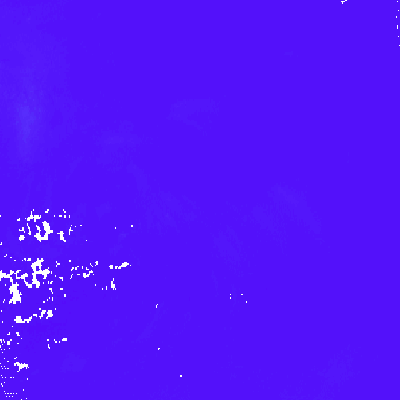

In [38]:
r1_filtered = raster.functions.con([(qa1>=0.75)&(r1>=0), r1,0])
r1_filtered

In [33]:
r1_filtered.minimum, r1_filtered.maximum # wrong values printed, con not applied

(-7.956242916407064e-05, 0.0158010832965374)

### Try using ArcPy rasters

In [39]:
r1_arcpy= r1._engine_obj._raster
qa1_arcpy = qa1._engine_obj._raster

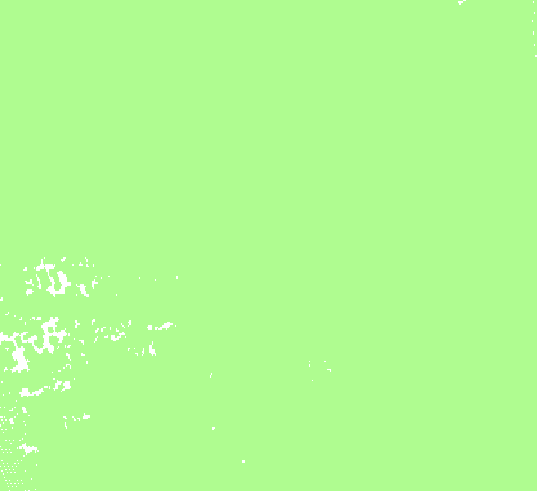

In [41]:
r1_arcpy_filtered = arcpy.ia.Con((qa1_arcpy>=0.75)&(r1_arcpy>=0), r1_arcpy,0)
r1_arcpy_filtered

In [42]:
r1_arcpy_filtered.minimum, r1_arcpy_filtered.maximum

(0.0, 0.00023641456209588796)

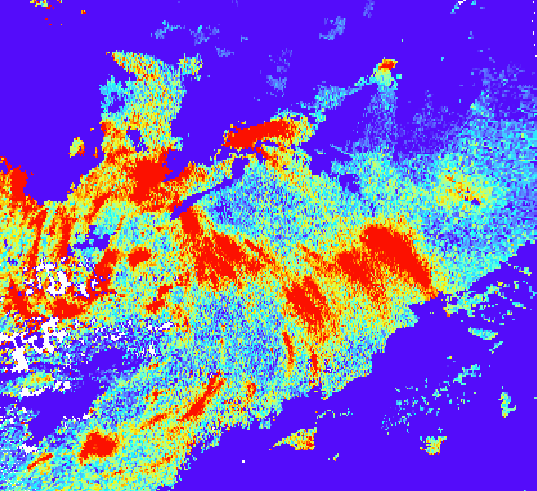

In [43]:
arcpy.ia.Stretch(r1_arcpy_filtered, stretch_type='StdDev')